## Diabetes Prediction

## Import modules

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import pickle
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

## Read dataset

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.shape

(768, 9)

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: >

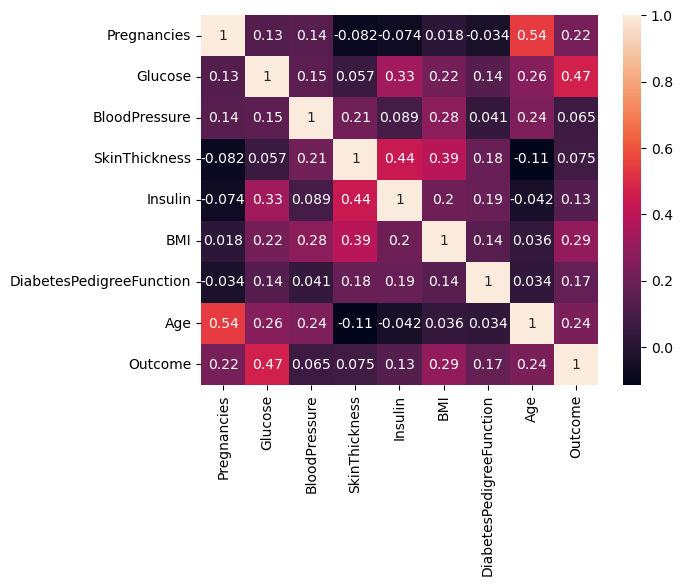

In [11]:
sns.heatmap(df.corr(),annot=True)

In [12]:
df["BMI"]=df["BMI"].replace(0,df["BMI"].mean())
df["BloodPressure"]=df["BMI"].replace(0,df["BloodPressure"].mean())
df["Glucose"]=df["BMI"].replace(0,df["Glucose"].mean())
df["Insulin"]=df["BMI"].replace(0,df["Insulin"].mean())
df["SkinThickness"]=df["BMI"].replace(0,df["SkinThickness"].mean())

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,32.450805,32.450805,32.450805,32.450805,32.450805,0.471876,33.240885,0.348958
std,3.369578,6.875374,6.875374,6.875374,6.875374,6.875374,0.331329,11.760232,0.476951
min,0.000000,18.200000,18.200000,18.200000,18.200000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,27.500000,27.500000,27.500000,27.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,32.000000,32.000000,32.000000,32.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,36.600000,36.600000,36.600000,36.600000,36.600000,0.626250,41.000000,1.000000
max,17.000000,67.100000,67.100000,67.100000,67.100000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: >

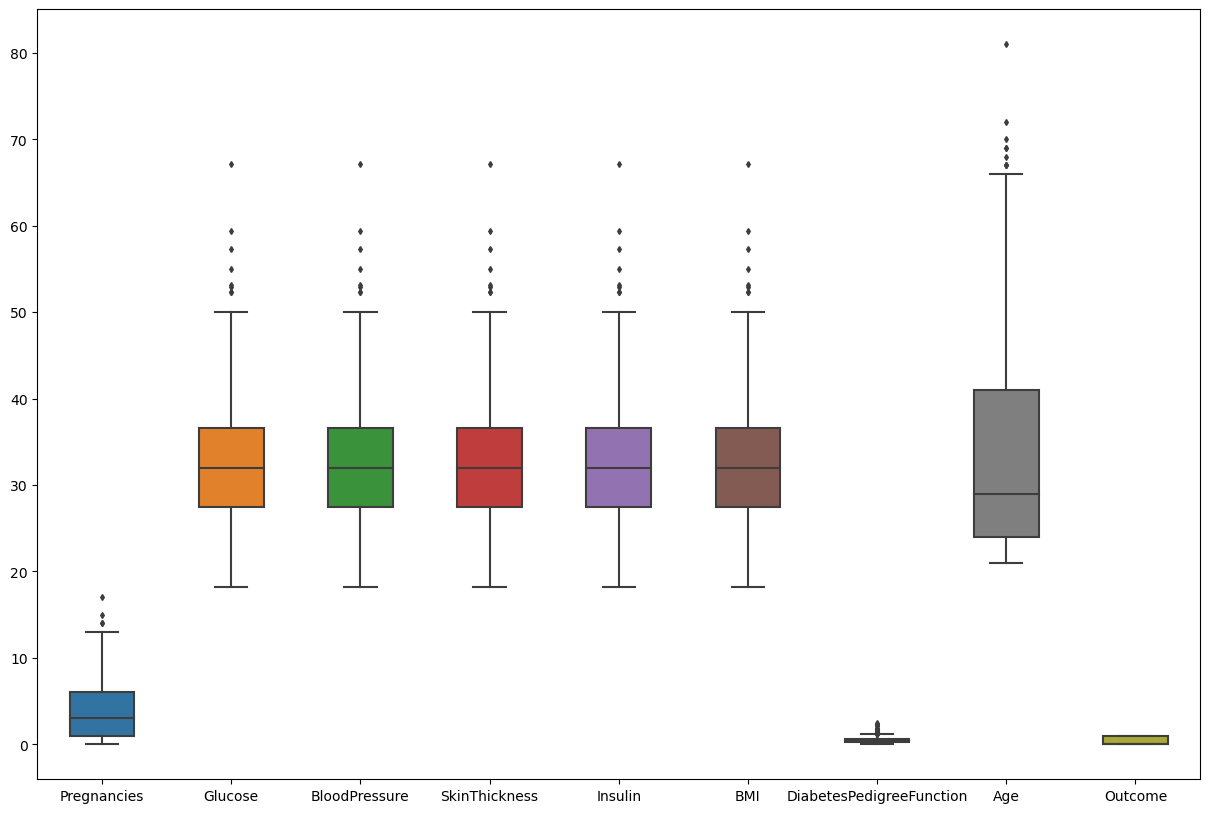

In [15]:
fig, ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,width=0.5, ax=ax,fliersize=3)

## Splitting Independant and dependant data

In [16]:
X=df.iloc[:,:-1]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,33.6,33.6,33.6,33.6,33.6,0.627,50
1,1,26.6,26.6,26.6,26.6,26.6,0.351,31
2,8,23.3,23.3,23.3,23.3,23.3,0.672,32
3,1,28.1,28.1,28.1,28.1,28.1,0.167,21
4,0,43.1,43.1,43.1,43.1,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,32.9,32.9,32.9,32.9,32.9,0.171,63
764,2,36.8,36.8,36.8,36.8,36.8,0.340,27
765,5,26.2,26.2,26.2,26.2,26.2,0.245,30
766,1,30.1,30.1,30.1,30.1,30.1,0.349,47


In [18]:
y=df.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Spliting into training and test data

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [23]:
X.shape,y.shape

((768, 8), (768,))

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((576, 8), (192, 8), (576,), (192,))

## Standardization

In [26]:
def scaler_standard(X_train,X_test):
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    
    file=open("standardscaler.pkl","wb")
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled, X_test_scaled

In [44]:
X_train_scaled,X_test_scaled=scaler_standard(X_train,X_test)

In [45]:
X_train_scaled

array([[ 1.50755225, -1.45561965, -1.45561965, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389,  0.09272955,  0.09272955, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -0.03629955, -0.03629955, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -1.14021518, -1.14021518, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -0.36604058, -0.36604058, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418, -0.09470985, -0.09470985, ..., -0.09470985,
         0.51627505,  2.953134  ]])

## Model implementation

In [46]:
log_reg=LogisticRegression()

In [47]:
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

## Hyperparametr Tuning

## Gridsearch CV

In [36]:
parameters={
    "penalty":["l1","l2"],
    "C":np.logspace(-3,3,7),
    "solver":["newton-cg","lbfgs","liblinear"]
}

In [37]:
logreg=LogisticRegression()

In [40]:
clf=GridSearchCV(logreg,param_grid=parameters,scoring="accuracy",cv=10)

In [48]:
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [49]:
clf.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [50]:
clf.best_score_

0.6962794918330308

In [52]:
y_pred=clf.predict(X_test_scaled)

In [53]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
366    1
301    1
382    0
140    0
463    0
Name: Outcome, Length: 192, dtype: int64

In [55]:
clf.predict_proba(X_test_scaled)

array([[0.36359234, 0.63640766],
       [0.76108669, 0.23891331],
       [0.71412354, 0.28587646],
       [0.65162963, 0.34837037],
       [0.85380934, 0.14619066],
       [0.885578  , 0.114422  ],
       [0.46046565, 0.53953435],
       [0.36580001, 0.63419999],
       [0.67460185, 0.32539815],
       [0.34263538, 0.65736462],
       [0.67980603, 0.32019397],
       [0.1499407 , 0.8500593 ],
       [0.5928424 , 0.4071576 ],
       [0.63661268, 0.36338732],
       [0.51633729, 0.48366271],
       [0.79121651, 0.20878349],
       [0.52704254, 0.47295746],
       [0.92902668, 0.07097332],
       [0.54082269, 0.45917731],
       [0.6400711 , 0.3599289 ],
       [0.46533309, 0.53466691],
       [0.49727298, 0.50272702],
       [0.78352584, 0.21647416],
       [0.57556767, 0.42443233],
       [0.91016805, 0.08983195],
       [0.72549849, 0.27450151],
       [0.93353458, 0.06646542],
       [0.17145348, 0.82854652],
       [0.89374457, 0.10625543],
       [0.83333629, 0.16666371],
       [0.

## Confusion matrix and accuracy score

In [56]:
print(confusion_matrix(y_test,y_pred))

[[116  14]
 [ 39  23]]


In [57]:
print(accuracy_score(y_test,y_pred))

0.7239583333333334


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       130
           1       0.62      0.37      0.46        62

    accuracy                           0.72       192
   macro avg       0.69      0.63      0.64       192
weighted avg       0.71      0.72      0.70       192



In [59]:
file=open("ModelForPrediction.pkl","wb")
pickle.dump(clg,file)
file.close()